# Fraud Detection Case Study — Logistic Regression Approach

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Step 1: Load the dataset

In [6]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape

(6362620, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Step 2: Basic Exploration

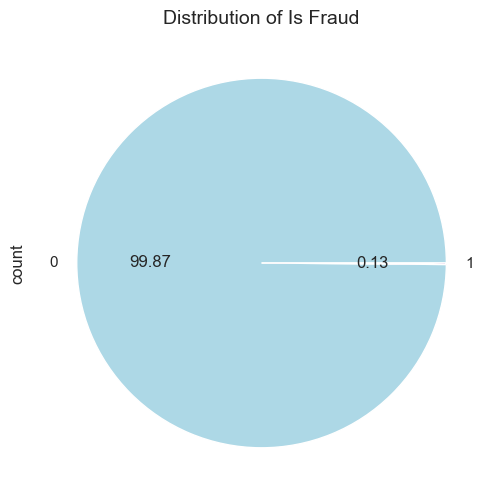

In [11]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(12,6), colors=['lightblue', 'purple'])
plt.title('Distribution of Is Fraud', fontsize=14)
plt.show()

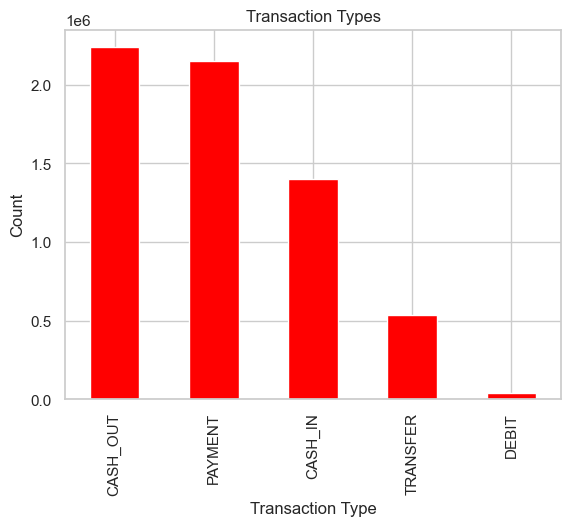

In [12]:
df["type"].value_counts().plot(kind="bar",title="Transaction Types" , color = "red")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

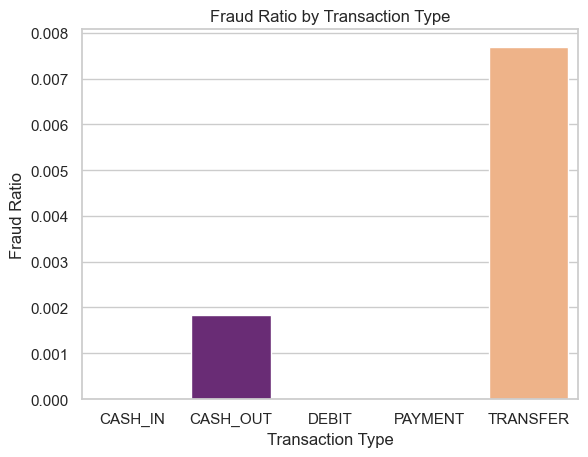

In [13]:
fraud_ratio = df.groupby('type')['isFraud'].mean().reset_index()
sns.barplot(x='type', y='isFraud', data=fraud_ratio, palette='magma')
plt.title('Fraud Ratio by Transaction Type')
plt.ylabel('Fraud Ratio')
plt.xlabel('Transaction Type')
plt.show()

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

# Step 3: Outlier and Distribution Check

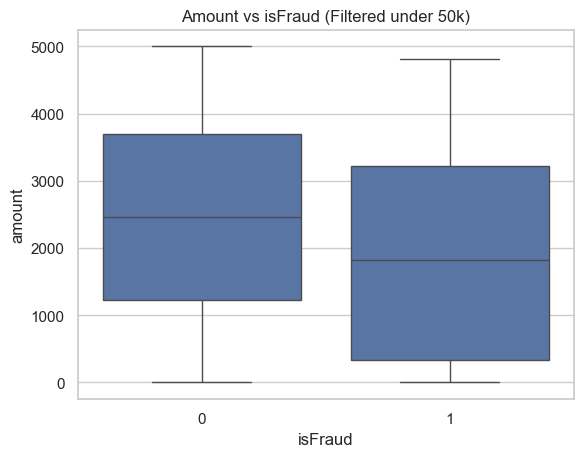

In [15]:
sns.boxplot(data= df[df["amount"] < 5000], x = "isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

# Step 4: Feature Engineering

In [16]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [17]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [18]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1238864)

In [19]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


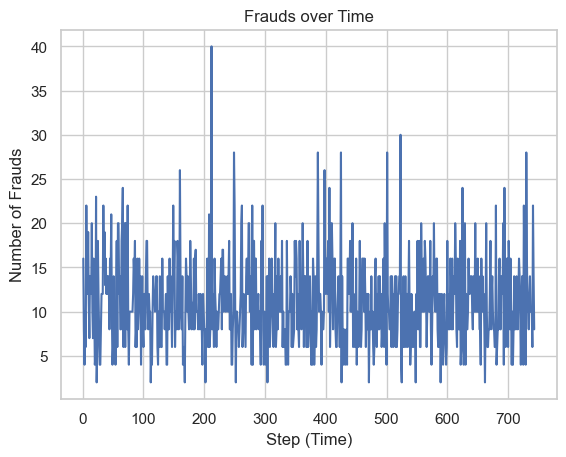

In [20]:
frauds_per_step = df[df["isFraud"] ==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over Time")
plt.grid(True)
plt.show()

In [21]:
df.drop(columns="step",inplace=True)

In [22]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


# Step 5: User Insight Exploration

In [23]:
top_senders = df["nameOrig"].value_counts().head(10)

In [24]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [25]:
top_receivers = df["nameDest"].value_counts().head(10)

In [26]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [27]:
frauds_users =df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [28]:
frauds_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [29]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [30]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

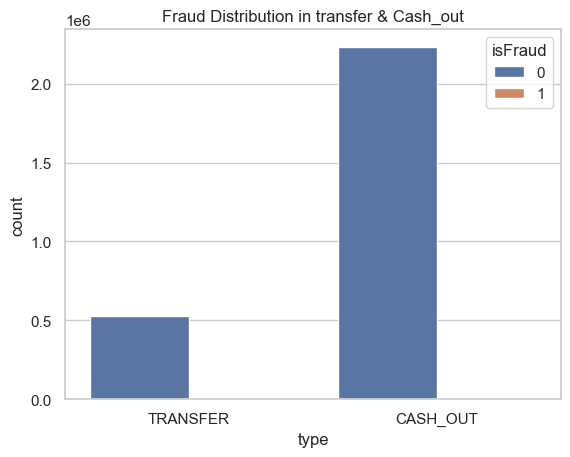

In [31]:
sns.countplot(data=fraud_types, x="type",hue="isFraud")
plt.title("Fraud Distribution in transfer & Cash_out")
plt.show()

# Step 6: Correlation Matrix


In [32]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [33]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


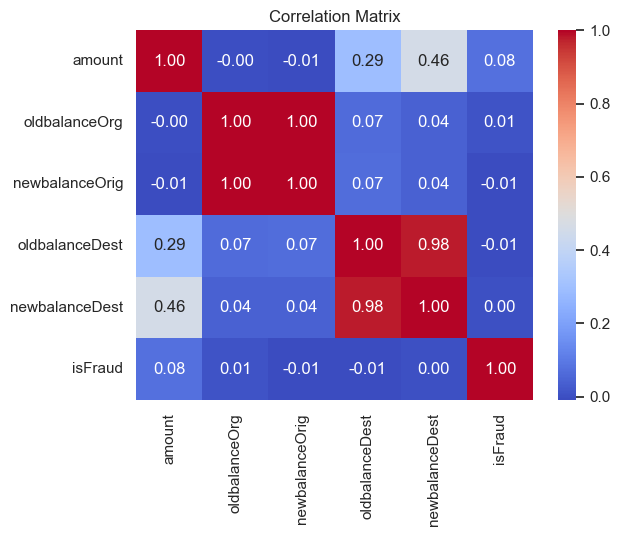

In [34]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 7: Fraud at Zero Balance After Transfer

In [35]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
    ]

In [36]:
len(zero_after_transfer)

1188074

In [37]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [38]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#  Step 8: Model Building

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [56]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


# Prepare features and target

In [57]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis =1)

In [58]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [59]:
categorial =["type"]
numeric =["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [60]:
y = df_model["isFraud"]
x = df_model.drop("isFraud",axis =1)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

In [62]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(),numeric),
        ("cat", OneHotEncoder(drop="first"), categorial)
    ],
    remainder= "drop"
)


In [63]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [64]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [65]:
y_pred = pipeline.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [67]:
confusion_matrix(y_test,y_pred)

array([[1800784,  105538],
       [    143,    2321]])

In [68]:
pipeline.score(x_test, y_test) * 100

94.46344430439034

#  AUC / ROC and Precision-Recall Evaluation

In [70]:
y_prob = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

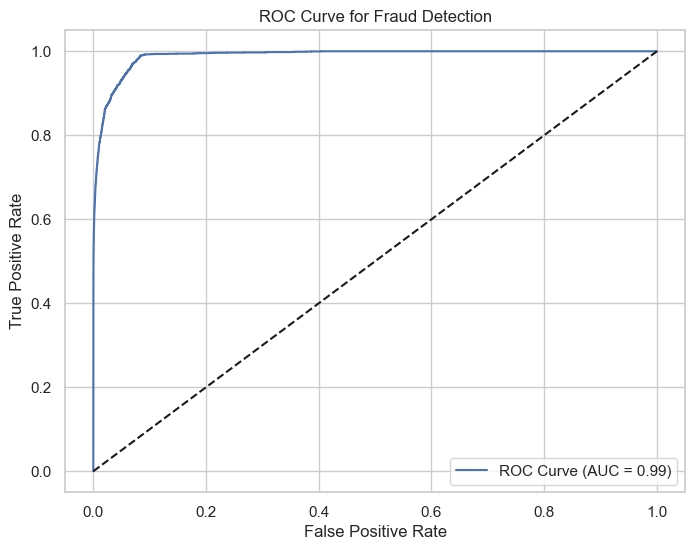

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve Evaluation

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [73]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

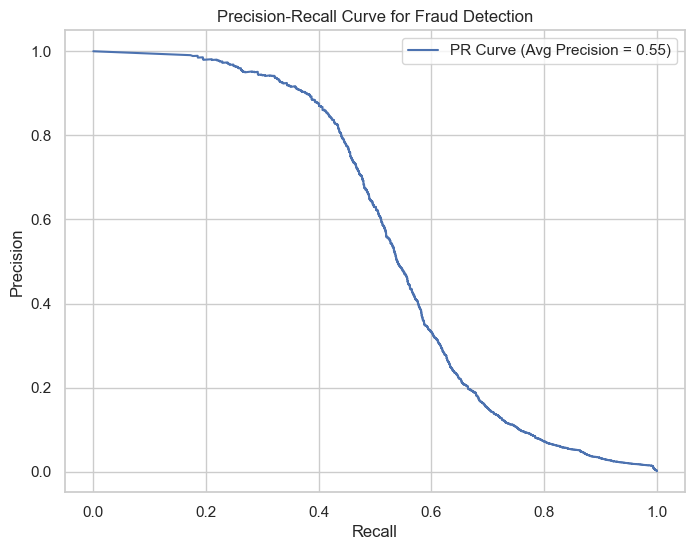

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (Avg Precision = {pr_auc:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Fraud Detection")
plt.legend()
plt.grid(True)
plt.show()

####  Interpretation:
#### While the ROC AUC of 0.99 indicates excellent model discrimination,
#### the average precision of 0.55 in the PR curve highlights the class imbalance challenge.
#### This trade-off is expected in fraud detection tasks, where minimizing missed frauds (high recall)
#### may lead to more false positives (lower precision).
#### Despite this, the model is highly valuable for proactive fraud detection,
#### especially when integrated with business validation rules or review teams.

# Feature Importance for Logistic Regression


In [75]:
feature_names = preprocessor.get_feature_names_out()
model_weights = pipeline.named_steps['clf'].coef_[0]
feature_importance = pd.Series(model_weights, index=feature_names).sort_values(key=np.abs, ascending=False)

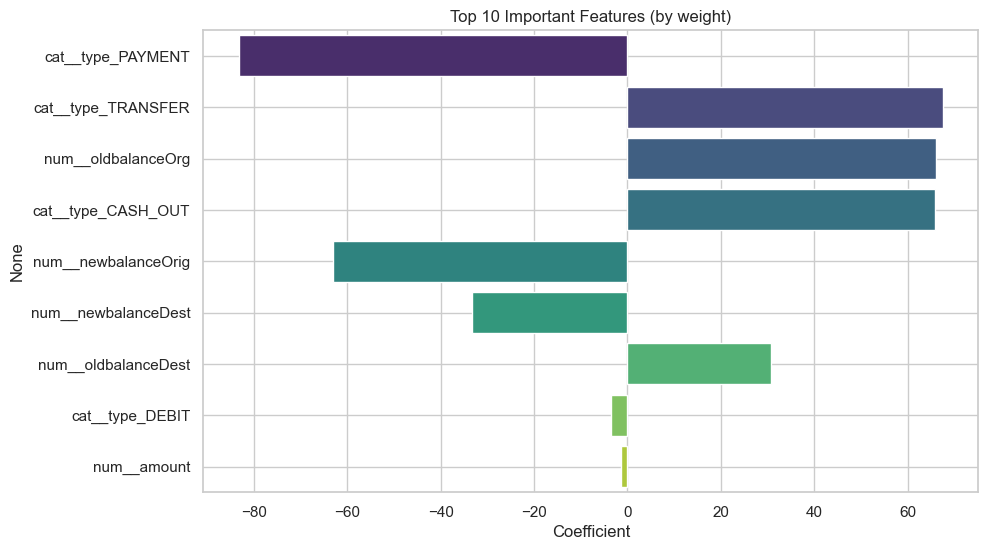

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")
plt.title("Top 10 Important Features (by weight)")
plt.xlabel("Coefficient")
plt.grid(True)
plt.show()

# Save Model

In [78]:
import joblib
joblib.dump(pipeline,"Fraud_detection_pipeline.pkl")

['Fraud_detection_pipeline.pkl']

# Detailed Assignment Questions & Responses:


### 1. Data cleaning including missing values, outliers, and multi-collinearity.
####    - We confirmed there are no missing values using `df.isnull().sum()`.
####    - Outliers in transaction amount were checked visually using a boxplot, especially filtering transactions under ₹5,000.
####    - New engineered features like `balanceDiffOrig` and `balanceDiffDest` helped identify inconsistencies in balance updates.
####    - Multi-collinearity was assessed using a correlation matrix heatmap to ensure no high correlation among predictors.

### 2. Describe your fraud detection model in elaboration.
####    - A Logistic Regression model was chosen due to its simplicity, interpretability, and efficiency on large datasets.
####    - The model was integrated into a `Pipeline` that includes scaling and one-hot encoding to preprocess numerical and categorical variables respectively.
####    - The class imbalance was addressed using `class_weight='balanced'` within the Logistic Regression.

### 3. How did you select variables to be included in the model?
####    - Features were selected based on domain knowledge and data insights: transaction type, amounts, and balance states.
####    - Highly correlated features were reviewed, and identifiers (`nameOrig`, `nameDest`) were removed to prevent overfitting.
####    - Engineered variables (`balanceDiffOrig`, `balanceDiffDest`) were designed to detect suspicious balance updates.

### 4. Demonstrate the performance of the model by using best set of tools.
####    - Evaluated using classification report (Precision, Recall, F1-score), confusion matrix, and ROC-AUC curve.
####    - Accuracy was reported, but ROC-AUC was prioritized to better reflect performance on imbalanced data.

### 5. What are the key factors that predict fraudulent customer?
####    - High transaction amounts
####    - Zero or low initial balance with high outgoing amount
####    - Transaction types: TRANSFER and CASH_OUT were most fraud-prone
####    - Abrupt changes in sender or receiver balances

### 6. Do these factors make sense? If yes, How? If not, How not?
####    - Yes, these factors align with common fraudulent behaviors:
####       • Fraudulent agents typically initiate TRANSFER/CASH_OUT to drain funds.
####        • They often zero out the origin account post-transaction.
####        • Large amounts with no matching account history are red flags.

### 7. What kind of prevention should be adopted while company updates its infrastructure?
####    - Monitor for zeroing origin balance post-TRANSFER/CASH_OUT.
####   - Flag transactions with mismatched balance updates.
####    - Introduce stricter KYC and recipient verification during high-risk transactions.
####    - Set up rule-based triggers for real-time fraud alerts.

### 8. Assuming these actions have been implemented, how would you determine if they work?
####    - Compare fraud incidence before and after deployment.
####    - Track false positive rates and precision to ensure genuine users are not flagged.
####    - Use A/B testing to measure improvement in detection rates.
####    - Collect feedback from internal fraud review teams for continuous refinement.

## 🚀 Additional Work: Streamlit Fraud Detection App
#### In addition to the notebook-based model, a Streamlit web app was developed for real-time fraud prediction.
#### - Users can input transaction details and receive instant feedback on whether the transaction is likely fraudulent.
#### - The app loads the trained model `Fraud_detection_pipeline.pkl` and applies the same preprocessing pipeline.
#### - Although .py files are not supported in the submission, the core app logic is provided below for reference.

####  Streamlit App Code:
#### import streamlit as st
#### import pandas as pd
#### import joblib
####
#### model = joblib.load("Fraud_detection_pipeline.pkl")
#### st.title("Fraud Detection Prediction App")
#### st.markdown("Please enter the transaction details and use the predict button")
#### st.divider()
####
#### transaction_type = st.selectbox("Transaction Type", ["PAYMENT", "TRANSFER", "CASH_OUT", "DEPOSIT"])
#### amount = st.number_input("Amount", min_value=0.0, value=1000.0)
#### oldbalanceOrg = st.number_input("Old Balance(Sender)", min_value=0.0, value=1000.0)
#### newbalanceOrig = st.number_input("New Balance(Sender)", min_value=0.0, value=9000.0)
#### oldbalanceDest = st.number_input("Old Balance(Receiver)", min_value=0.0, value=0.0)
#### newbalanceDest = st.number_input("New Balance(Receiver)", min_value=0.0, value=0.0)
####
#### if st.button("Predict"):
####     input_data = pd.DataFrame([{
####        "type": transaction_type,
####         "amount": amount,
####         "oldbalanceOrg": oldbalanceOrg,
####         "newbalanceOrig": newbalanceOrig,
####         "oldbalanceDest": oldbalanceDest,
####         "newbalanceDest": newbalanceDest
####     }])
####     prediction = model.predict(input_data)[0]
####     st.subheader(f"Prediction: '{int(prediction)}'")
####     if prediction == 1:
####         st.error("This transaction can be fraud")
####     else:
####         st.success("This transaction looks like it is not fraud")
